<a href="https://colab.research.google.com/github/SashaKryzh/ft_linear_regression/blob/master/ft_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as prepr
import matplotlib.pyplot as plt
from matplotlib import animation, rc

In [ ]:
DATA_URL = 'https://raw.githubusercontent.com/SashaKryzh/ft_linear_regression/master/data.csv'
df = pd.read_csv(DATA_URL)
df.head()

,km,price
0,240000,3650
1,139800,3800
2,150500,4400
3,185530,4450
4,176000,5250


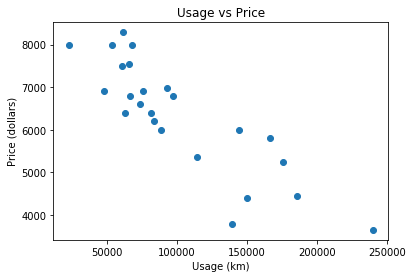

In [ ]:
### BONUS ###

def scatter(df):
  fig, ax = plt.subplots()
  ax.scatter(df['km'], df['price'])

  ax.set_title('Usage vs Price')
  ax.set_ylabel('Price (dollars)')
  ax.set_xlabel('Usage (km)')

  plt.show()

scatter(df)

# Train

In [48]:
__weights__ = np.zeros(2)

In [49]:
# Scale data
X = df['km'].to_numpy().reshape(-1, 1)
scaler = prepr.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
print(X_scaled)

[[ 2.69433217]
 [ 0.75116081]
 [ 0.95866514]
 [ 1.6379994 ]
 [ 1.4531848 ]
 [ 0.26633762]
 [ 1.27476986]
 [-0.23399991]
 [ 0.84230757]
 [-0.33096455]
 [-0.36918801]
 [-0.73705246]
 [-0.52489383]
 [-0.06916003]
 [-0.66064432]
 [-0.48562315]
 [-1.02455261]
 [-0.1564282 ]
 [-0.77799093]
 [-0.68635935]
 [-0.91275238]
 [-0.63155493]
 [-1.51589183]
 [-0.76170087]]


In [51]:
def train(X, y, lr=0.1):
  X = np.c_[np.ones(X.shape[0], dtype=np.int8), np.copy(X)]
  w = np.random.rand(X.shape[1])

  iter = 0
  perf = []

  while True:
    iter += 1
    
    error = X.dot(w) - y
    cost = np.sum(error ** 2) / (2 * X.shape[0])

    perf.append((iter, cost, w))

    if iter > 1 and abs(perf[-2][1] - cost < 0.001):
      break

    w = w - lr * (1 / X.shape[0]) * np.sum(error[:, None] * X, axis=0)

  return perf
  

perf = train(X_scaled, df['price'].to_numpy())
__weights__ = perf[-1][2]
print(perf[-1])

(107, 222822.6266515941, array([ 6331.74395849, -1106.0042588 ]))


In [ ]:
### BONUS ###

def precision(X, y):
  X = np.c_[np.ones(X.shape[0], dtype=np.int8), np.copy(X)]
  prediction = X.dot(__weights__)
  errors = abs(prediction / y - 1)
  precision = 1 - errors.mean()
  print('Precision is %f' % precision)

precision(X_scaled, df['price'].to_numpy())

Precision is 0.903525


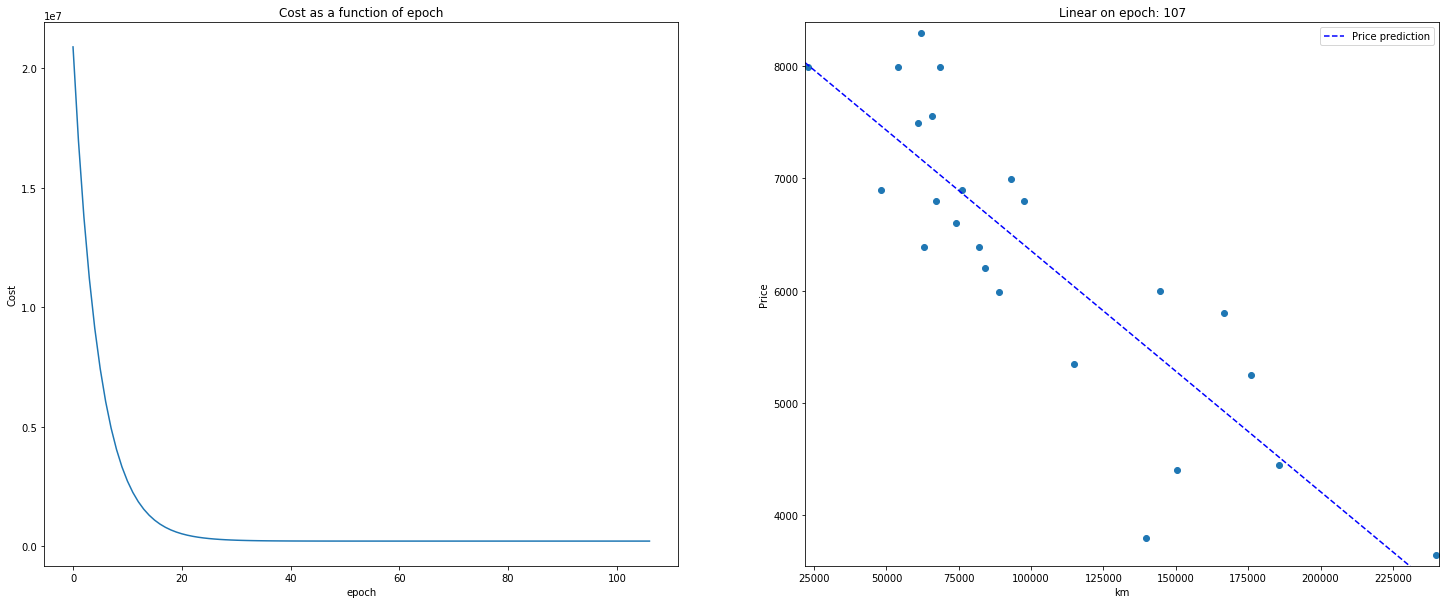

In [ ]:
### BONUS ###

def plot_performance(performance, X, y):
  fig, axes = plt.subplots(ncols=2, figsize=(25, 10))
  inversed = scaler.inverse_transform(X)

  #
  # Cost as a function of epoch
  #

  axes[0].set_title('Cost as a function of epoch')
  axes[0].set_xlabel('epoch')
  axes[0].set_ylabel('Cost')
  cost = list(map(lambda x: x[1], performance))
  axes[0].plot(range(0, performance[-1][0]), cost)

  #
  # Decision boundary
  #

  axes[1].set_title('Linear on epoch: %i' % performance[-1][0])
  axes[1].set_xlabel('km')
  axes[1].set_ylabel('Price')
  axes[1].scatter(inversed, y)

  # Displaying decision boundary on epoch
  p = performance[-1][2]
  plot_x = np.array([min(inversed) - 1000, max(inversed) + 1000])
  plot_y = p[0] + scaler.transform(plot_x) * p[1]
  axes[1].plot(plot_x, plot_y, 'b--', label = "Price prediction")

  # Seting (x, y) plot limits
  axes[1].set_xlim(min(inversed) - 1000, max(inversed) + 1000)
  axes[1].set_ylim(min(y) - 100, max(y) + 100)

  # Legend
  axes[1].legend(loc='upper right')
  axes[1].margins(0)

  plt.show()
  
plot_performance(perf, X_scaled, df['price'].to_numpy())

In [ ]:
### BONUS ###

def animate_performace(performance, X, y):
  inversed = scaler.inverse_transform(X)

  # Creating plot
  fig, axes = plt.subplots(ncols=2, figsize=(25, 10))
  plt.close()

  #
  # Errors as a function of epoch
  #

  axes[0].set_title('Cost as a function of epoch')
  axes[0].set_xlabel('epoch')
  axes[0].set_ylabel('Cost')
  cost = list(map(lambda x: x[1], performance))

  #
  # Decision boundary
  #

  axes[1].set_xlabel('km')
  axes[1].set_ylabel('Price')

  # Seting (x, y) plot limits
  axes[1].set_xlim(min(inversed), max(inversed))
  axes[1].set_ylim(min(y) - 100, max(y) + 100)

  axes[0].set_xlim(0, performance[-1][0] + 5)
  axes[0].set_ylim(0, max(cost) + 10)

  # To anim
  fe ,= axes[0].plot([], [], lw=3)
  db ,= axes[1].plot([], [], 'b--', label = "Linear", lw=2)
  axes[1].scatter(inversed, y)

  # Legend
  axes[1].legend(loc='upper right')
  axes[1].margins(0)

  # Animation
  def init():
    fe.set_data([], [])
    db.set_data([], [])
    return db, fe

  plot_x = np.array([min(inversed), max(inversed)])
  def animate(i):
    fe.set_data(range(performance[i][0]), cost[:i + 1])

    p = performance[i][2]
    plot_y = p[0] + scaler.transform(plot_x) * p[1]
    db.set_data(plot_x, plot_y)
    
    axes[1].set_title('Linear on epoch: %i' % (i + 1))
    axes[1].scatter(X, y)
    
    return db, fe

  anim = animation.FuncAnimation(fig, animate, init_func=init, frames=performance[-1][0], blit=True)

  # Note: below is the part which makes it work on Colab
  rc('animation', html='jshtml')
  return anim

animate_performace(perf, X_scaled, df['price'].to_numpy())


# Predict

In [ ]:
def predict(km):
  if km <= 0:
    print('Wrong input')
  elif __weights__ is None:
    print("You didn't train the model")
  else:
    scaled = scaler.transform([[km]])
    prediction = __weights__[0] + __weights__[1] * scaled[0][0]
    print('Estimated price for the car is: %i' % prediction)

In [52]:
predict(3200)

Estimated price for the car is: 8430


In [ ]:
predict(20000)

Estimated price for the car is: 8070


In [ ]:
predict(360000)

Estimated price for the car is: 777
